In [2]:
import numpy as np 
import math 
import pandas as pd 
pd.set_option('display.float_format',lambda x:'%.3f' % x)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns 
sns.set_palette('muted')
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import os 
os.chdir(r'C:\Users\guzhiwen\Desktop\pdd_data_set')
import core_card as sc
import missingno

# 解决matplotlib显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [3]:
# 导入 data_input 处理好的数据
df1 = pd.read_csv('data_input1.csv',encoding='gb18030')

In [4]:
df1.shape

(49999, 229)

In [5]:
# 样本的好坏比
df1.target.value_counts()

0    46281
1     3718
Name: target, dtype: int64

## 借款成交量的时间趋势变化 

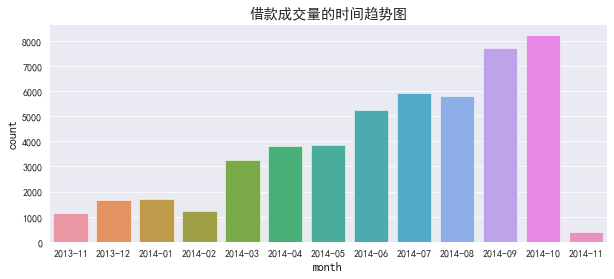

In [6]:
# 借款成交时间的范围
import datetime as dt
df1['ListingInfo'] = pd.to_datetime(df1.ListingInfo)
# 每个月份的用户数分布
df1['month'] = df1.ListingInfo.dt.strftime('%Y-%m')
# 绘制成交量的时间趋势图
plt.figure(figsize=(10,4))
plt.title('借款成交量的时间趋势图')
# plt.rcParams['font.sans-serif']=['Microsoft YaHei']
sns.countplot(data=df1.sort_values('month'),x='month')
plt.show()

## 违约情况的时间趋势分析 

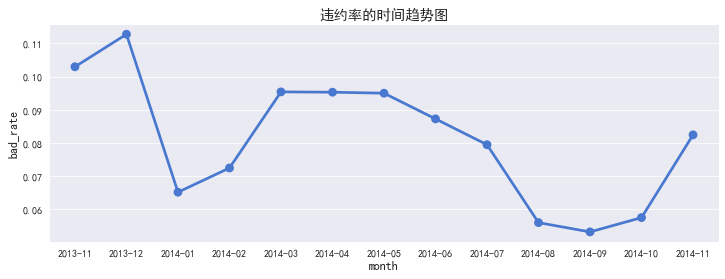

In [7]:
month_group = df1.groupby('month') # 根据月份计算每个月的违约率
time_bad_trend = pd.DataFrame()
time_bad_trend['total'] = month_group.target.count()
time_bad_trend['bad'] = month_group.target.sum()
time_bad_trend['bad_rate']=time_bad_trend['bad']/time_bad_trend['total']
time_bad_trend = time_bad_trend.reset_index()
plt.figure(figsize=(12,4))
plt.title('违约率的时间趋势图')
sns.pointplot(data=time_bad_trend,x='month',y='bad_rate',linestyles='-')
plt.show()

In [17]:
time_bad_trend

,month,total,bad,bad_rate
0,2013-11,1146,118,0.103
1,2013-12,1676,189,0.113
2,2014-01,1688,110,0.065
3,2014-02,1242,90,0.072
4,2014-03,3239,309,0.095
5,2014-04,3830,365,0.095
6,2014-05,3863,367,0.095
7,2014-06,5260,459,0.087
8,2014-07,5926,471,0.079
9,2014-08,5804,325,0.056


## 数据清洗 

In [9]:
# 检查数值型变量的缺失
# 原始数据中-1作为缺失的标识，将-1替换为np.nan
data1 = df1.drop(['ListingInfo','month'],axis=1)
data1 = data1.replace({-1:np.nan})

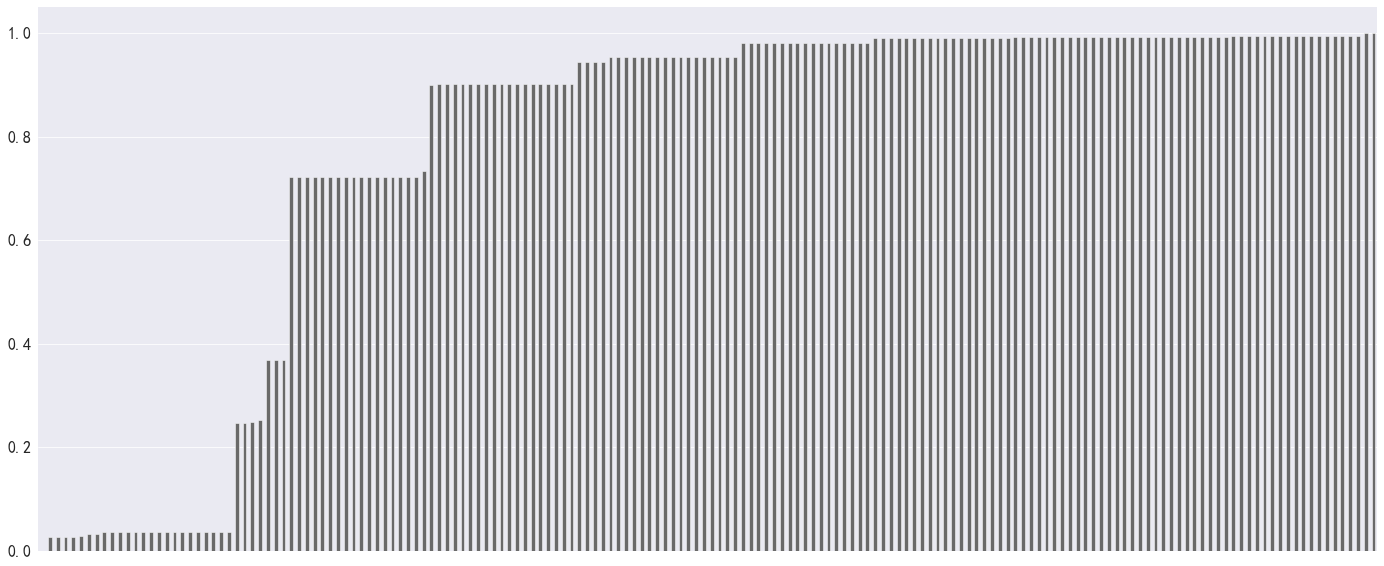

In [10]:
# 缺失变量的数据可视化
missing_df =sc.missing_cal(data1)
missing_col = list(missing_df[missing_df.missing_pct>0].col)
missingno.bar(data1.loc[:,missing_col])

In [11]:
# 删除缺失率在80%以上的变量
data1 = sc.missing_delete_var(df=data1,threshold=0.8)
data1.shape

缺失率超过0.8的变量个数为25


(49999, 203)

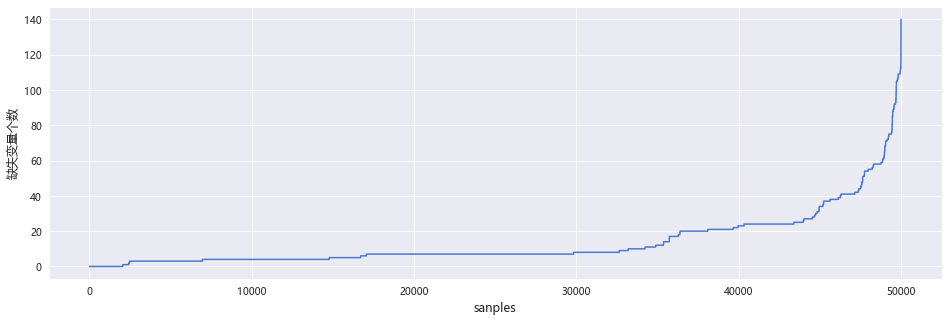

In [12]:
# 样本的趋势个数可视化
sc.plot_missing_user(df=data1,plt_size=(16,5))

In [13]:
# 删除变量缺失个数在100个以上的用户
data1 = sc.missing_delete_user(df=data1,threshold=100)

缺失变量个数在100以上的用户数有298个


In [14]:
# 同值化处理
base_col = [x for x in data1.columns if x!='target']
data1 = sc.const_delete(col_list=base_col,df=data1,threshold=0.9)
data1 = data1.reset_index(drop=True)
data1.shape

常变量/同值化处理的变量个数为56


(49701, 147)

In [16]:
# 保存数据至本地
data1.to_csv('C:/Users/guzhiwen/Desktop/pdd_data_set/data1_clean.csv',encoding='gb18030',index=False)